## 1

The simple linear regression model can be represented by $Y=\beta_0+\beta_1 X+\epsilon$

where $Y$ is the outcome, $X$ is the predictor, $\beta_1$ is the slope, $\beta_0$ is the y-intercept, and $\epsilon$ is the error term. The error term is normally distributed, so $\epsilon\sim N(0,\sigma^2)$. 

A sample is taken by providing a set of inputs to the regression model, which will output a value for each input you give it. The values will be normally distributed around the line of best fit of the sample, which should be around $Y=\beta_0+\beta_1 X$ for a sample with a relatively large sample size. The spread in the values around the line of best fit depends on the normal distribution used in the error term (the larger the standard deviation in the error, the more spread out the points will be)

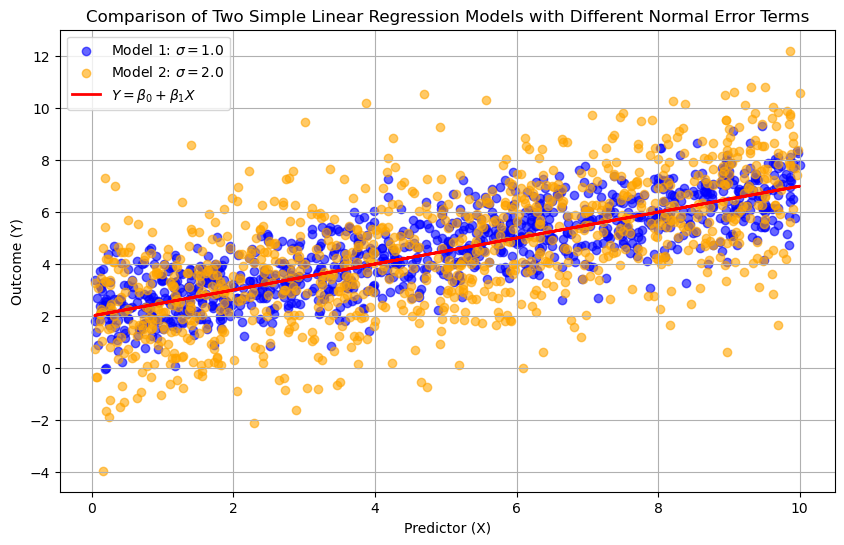

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate predictor variable X
np.random.seed(42)  # For reproducibility
X = np.random.uniform(0, 10, 1000)  # 100 samples of X uniformly distributed between 0 and 10

# Step 2: Define the slope and intercept for both models
beta_0 = 2  # Intercept
beta_1 = 0.5  # Slope

# Step 3: Generate normal error terms with different standard deviations
sigma_1 = 1.0  # Standard deviation for the first error term
sigma_2 = 2.0  # Standard deviation for the second error term

epsilon_1 = np.random.normal(0, sigma_1, size=X.shape)  # Error term for Model 1
epsilon_2 = np.random.normal(0, sigma_2, size=X.shape)  # Error term for Model 2

# Step 4: Compute Y for both models using the linear regression model
Y1 = beta_0 + beta_1 * X + epsilon_1  # Model 1 with sigma_1
Y2 = beta_0 + beta_1 * X + epsilon_2  # Model 2 with sigma_2

# Visualize both models on the same plot
plt.figure(figsize=(10, 6))
plt.scatter(X, Y1, color='blue', alpha=0.6, label=r'Model 1: $\sigma=1.0$')
plt.scatter(X, Y2, color='orange', alpha=0.6, label=r'Model 2: $\sigma=2.0$')
plt.plot(X, beta_0 + beta_1 * X, color='red', label=r'$Y = \beta_0 + \beta_1 X$', linewidth=2)
plt.xlabel('Predictor (X)')
plt.ylabel('Outcome (Y)')
plt.title('Comparison of Two Simple Linear Regression Models with Different Normal Error Terms')
plt.legend()
plt.grid(True)
plt.show()


https://chatgpt.com/share/671ab2c5-8640-8013-9765-fbd86eab5ce9

## 2

                            OLS Regression Results                            
Dep. Variable:                     Y1   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     2049.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          4.11e-244
Time:                        04:34:23   Log-Likelihood:                -1406.3
No. Observations:                1000   AIC:                             2817.
Df Residuals:                     998   BIC:                             2826.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1748      0.061     35.605      0.0

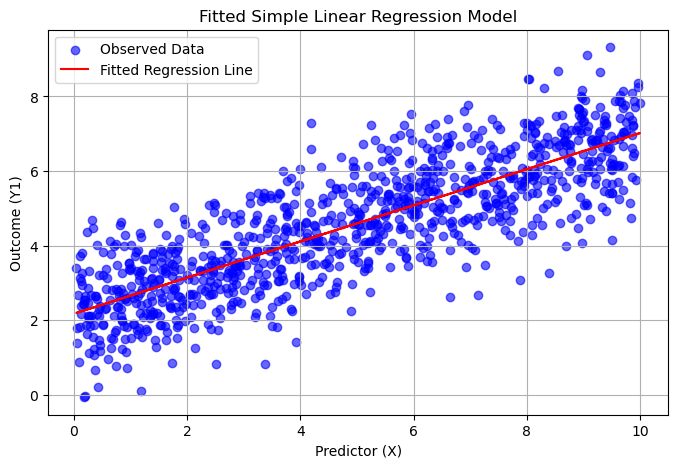

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Step 1: # Create a pandas DataFrame
data = pd.DataFrame({'X': X, 'Y1': Y1})

# Step 2: Fit the Simple Linear Regression model using statsmodels
model = smf.ols('Y1 ~ X', data=data).fit()

# Print the summary of the fitted model
print(model.summary())

# Step 3: Visualize the fitted model
plt.figure(figsize=(8, 5))
plt.scatter(data['X'], data['Y1'], color='blue', alpha=0.6, label='Observed Data') # Use Y1 from question 1
plt.plot(data['X'], model.fittedvalues, color='red', label='Fitted Regression Line')
plt.xlabel('Predictor (X)')
plt.ylabel('Outcome (Y1)')
plt.title('Fitted Simple Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()


https://chatgpt.com/share/671ab2c5-8640-8013-9765-fbd86eab5ce9

## 3

In question 1, we sampled a known linear regression model 1000 times and plotted them on a graph. In question 2, we used the samples from question 1 and used them to conduct inference on what the line from the linear regression model is likely to be.

## 4

In [3]:
model.fittedvalues

0      3.989508
1      6.781195
2      5.721448
3      5.075409
4      2.930724
         ...   
995    2.618515
996    6.619362
997    2.837696
998    6.778884
999    4.335774
Length: 1000, dtype: float64

In [4]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.1748,0.061,35.605,0.000,2.055,2.295
X,0.4845,0.011,45.264,0.000,0.464,0.506


`fitted_model.fittedvalues` are derived by inputing a given list of inputs (`X`, which was defined in Q1) into the fitted linear regression model that was calculated in Q2 using the inputs and outputs of the original linear regression model from Q1. The fitted model is defined in `model.summary().tables[1]`.

## 5

The ordinary least square approach works by minimizing the sum of squared residuals (residuals are $Y_i-\hat y_i$, the distance from a data point to the predicted data point given by a fitted linear regression model). Residuals are different from the error term, which is a normal distribution that shows the likelihood of actual data points being a certain distance away from the predicted line. Squares are used as it amplifies larger errors, so the resultant model will predict results that are fairly close to the actual data points.

## 6

The first statement is `1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()` and is a calculation for the coefficient of determination (or $R^2$)

`Y-fitted_model.fittedvalues` calculates the residuals for each data point, so by squaring them and calculating their sum in `((Y-fitted_model.fittedvalues)**2).sum()` we obtain the sum of squared residuals. Next, `Y-Y.mean()` calculates the distance from each data point to the mean of all the data points. This is then squared and then summed in `((Y-Y.mean())**2).sum()`. Both statements are similar to the calculation for variance, but without dividing by the number of total values. However, since this number is the same for the first and second part, they cancel out and can be ignored. Hence, `((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()` shows the proportion of variation in outcome *not* explained by the model. To get the proportion of variation in outcome explained by the model, we subtract it from one, which leads us to `1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()`

`fitted_model.rsquared` calculates the $R^2$ value for a linear regression model. The $R^2$ value can be interpreted as the proportion of variation in outcome that is explained by the model, so the higher the value, the better the model explains the actual outcome, meaning that the model is more accurate.

`np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2` gives the $R^2$ value for the linear regression model (it shows the strength of the correlation between the predicted and actual values), while `np.corrcoef(Y,x)[0,1]**2` shows the strength of the correlation between the $X$ (the input) and the output

https://chatgpt.com/share/672013dc-6390-8013-aba3-831147049087

## 7

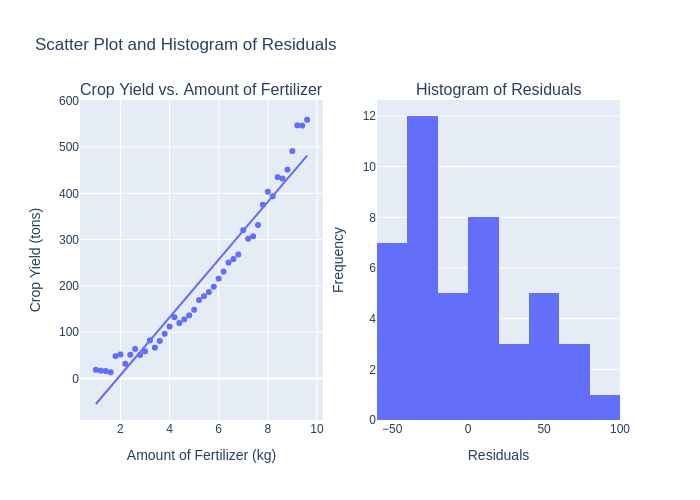

In [5]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png") #FOR ALL GitHub and MarkUs SUBMISSIONS

The example data is for the relationship between the amount of fertilizer used and the crop yield. According to the fitted linear regression model, the more fertilizer used, the higher the crop yield. However, it is impossible to increase the amount of fertilizer used infinitely (at some point the soil will be completely replaced by fertilizer) and it is likely that the relationship will no longer be linear after some point (fertilizer could potentially have a negative impact on crop yield in high concentrations)

## 8

In [6]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        04:34:25   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Null Hypothesis: $\beta_1=\text{waiting}=0$

In this example, the 95% interval of waiting is between 0.071 and 0.080 and does not contain 0, hence the p-value must be smaller than 0.05 and we can reject the null hypothesis.

## 9

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


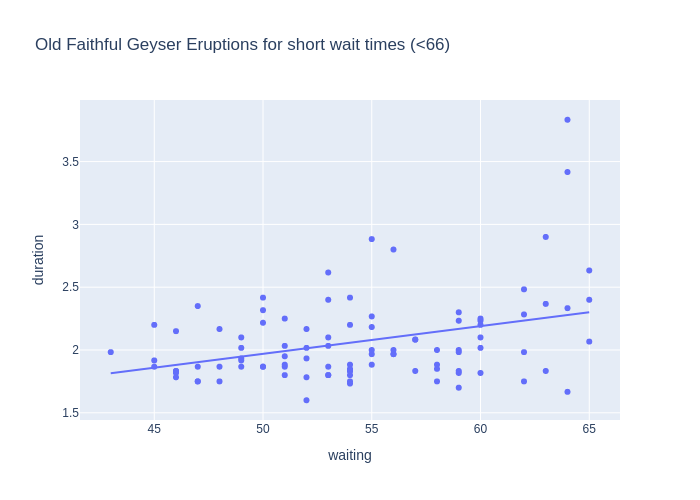

In [7]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # FOR ALL GitHub and MarkUs SUBMISSIONS

Wait limit of 62: The 95% confidence interval of waiting ranges between -0.005 and 0.019. This means that 0 is within the 95% confidence interval, so we do not have sufficient evidence against the null hypothesis and therefore cannot reject it.

Wait limit of 64: The 95% confidence interval of waiting ranges between 0.001 and 0.022. This means that 0 is not within the 95% confidence interval, so we have sufficient evidence against the null hypothesis and therefore can reject it.

Wait limit of 66: The 95% confidence interval of waiting ranges between 0.010 and 0.034. This means that 0 is not within the 95% confidence interval, so we have sufficient evidence against the null hypothesis and therefore can reject it.

## 10

Number of observations with waiting > 71: 160
Original OLS Regression Results:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024

Observed slope: 0.012244029446523483
Observed p-value: 0.038135755338567744


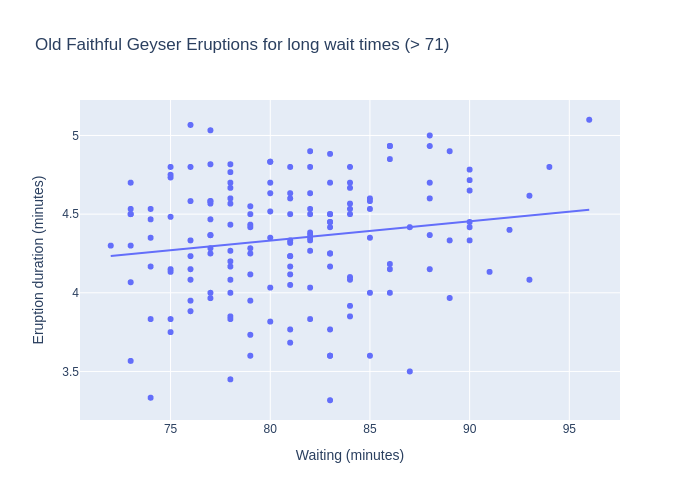

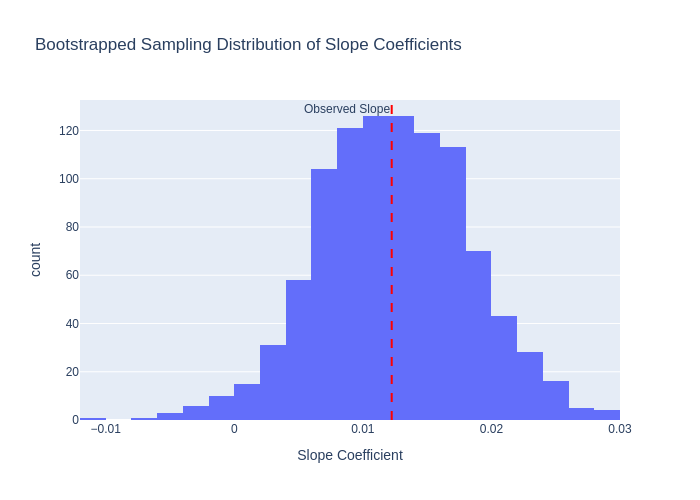


95% Bootstrap Confidence Interval for Slope: [0.0007, 0.0240]
0 is NOT within the 95% bootstrap confidence interval.


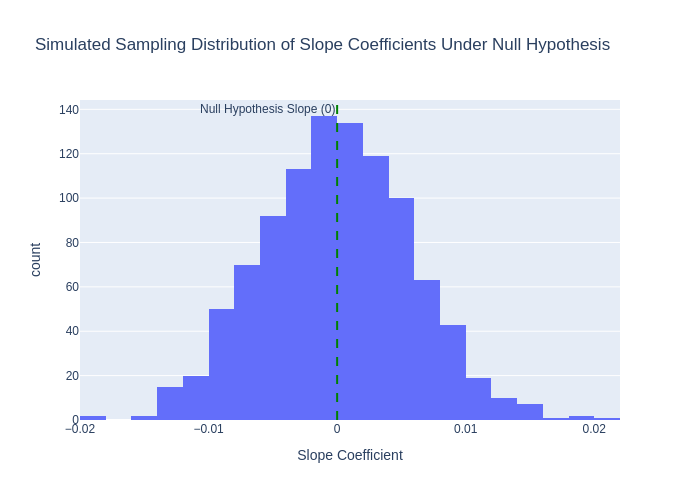


Simulated p-value: 0.036
Original OLS p-value: 0.038135755338567744
The simulated p-value matches the OLS p-value.


In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.datasets import get_rdataset

# Set random seed for reproducibility
np.random.seed(42)

# Load the 'faithful' dataset
dataset = get_rdataset('faithful', 'datasets')
old_faithful = dataset.data

# Define the long wait condition
long_wait_limit = 71
long_wait = old_faithful['waiting'] > long_wait_limit
data_long_wait = old_faithful[long_wait].copy()
n = len(data_long_wait)
print(f"Number of observations with waiting > {long_wait_limit}: {n}")

# Display the OLS regression results
ols_model = smf.ols('eruptions ~ waiting', data=data_long_wait).fit()
print("Original OLS Regression Results:")
print(ols_model.summary().tables[1])

# Extract observed slope and p-value
observed_slope = ols_model.params['waiting']
observed_pvalue = ols_model.pvalues['waiting']
print(f"\nObserved slope: {observed_slope}")
print(f"Observed p-value: {observed_pvalue}")

# Plot the original data with OLS trendline
fig_original = px.scatter(
    data_long_wait, 
    x='waiting', 
    y='eruptions', 
    title=f"Old Faithful Geyser Eruptions for long wait times (> {long_wait_limit})",
    labels={'waiting': 'Waiting (minutes)', 'eruptions': 'Eruption duration (minutes)'},
    trendline='ols'
)
fig_original.update_layout(width=700, height=500)
fig_original.show(renderer="png")  # Use renderer="png" as per instructions

# ---------------------------- Bootstrap Sampling ---------------------------- #

# Number of bootstrap samples
B = 1000
boot_slopes = np.empty(B)

# Prepare the data
X = data_long_wait['waiting'].values
Y = data_long_wait['eruptions'].values
data_array = np.column_stack((X, Y))

# Perform bootstrap sampling
for b in range(B):
    # Sample with replacement
    indices = np.random.randint(0, n, n)
    sample = data_array[indices]
    sample_df = pd.DataFrame(sample, columns=['waiting', 'eruptions'])
    
    # Fit OLS regression
    model = smf.ols('eruptions ~ waiting', data=sample_df).fit()
    
    # Store the slope coefficient
    boot_slopes[b] = model.params['waiting']

# Create a DataFrame for bootstrapped slopes
boot_df = pd.DataFrame({'slope': boot_slopes})

# Visualize the bootstrapped slope distribution
fig_boot = px.histogram(
    boot_df, 
    x='slope', 
    nbins=30, 
    title='Bootstrapped Sampling Distribution of Slope Coefficients',
    labels={'slope': 'Slope Coefficient'}
)
fig_boot.add_vline(x=observed_slope, line_dash="dash", line_color="red", 
                  annotation_text="Observed Slope", annotation_position="top left")
fig_boot.update_layout(width=700, height=500)
fig_boot.show(renderer="png")

# Calculate 95% bootstrap confidence interval
ci_lower = np.percentile(boot_slopes, 2.5)
ci_upper = np.percentile(boot_slopes, 97.5)
print(f"\n95% Bootstrap Confidence Interval for Slope: [{ci_lower:.4f}, {ci_upper:.4f}]")

# Check if 0 is within the confidence interval
if ci_lower <= 0 <= ci_upper:
    print("0 is within the 95% bootstrap confidence interval.")
else:
    print("0 is NOT within the 95% bootstrap confidence interval.")

# ------------------------ Simulation Under Null ---------------------------- #

# Parameters under the null hypothesis
beta_0 = 1.65
beta_1 = 0
sigma = 0.37

sim_slopes = np.empty(B)

for b in range(B):
    # Simulate Y under null hypothesis
    epsilon = np.random.normal(0, sigma, n)
    Y_sim = beta_0 + beta_1 * X + epsilon
    
    # Fit OLS regression
    sim_model = smf.ols('Y_sim ~ X', data=pd.DataFrame({'X': X, 'Y_sim': Y_sim})).fit()
    
    # Store the slope coefficient
    sim_slopes[b] = sim_model.params['X']

# Create a DataFrame for simulated slopes
sim_df = pd.DataFrame({'slope': sim_slopes})

# Visualize the simulated slope distribution under null
fig_sim = px.histogram(
    sim_df, 
    x='slope', 
    nbins=30, 
    title='Simulated Sampling Distribution of Slope Coefficients Under Null Hypothesis',
    labels={'slope': 'Slope Coefficient'}
)
fig_sim.add_vline(x=0, line_dash="dash", line_color="green", 
                 annotation_text="Null Hypothesis Slope (0)", annotation_position="top left")
fig_sim.update_layout(width=700, height=500)
fig_sim.show(renderer="png")

# Calculate simulated p-value
# Two-tailed: proportion of simulated slopes >= |observed_slope| or <= -|observed_slope|
extreme_count = np.sum(np.abs(sim_slopes) >= np.abs(observed_slope))
sim_pvalue = extreme_count / B
print(f"\nSimulated p-value: {sim_pvalue}")

print(f"Original OLS p-value: {observed_pvalue}")

# Compare p-values
if np.isclose(sim_pvalue, observed_pvalue, atol=0.01):
    print("The simulated p-value matches the OLS p-value.")
else:
    print("The simulated p-value does NOT match the OLS p-value.")



https://chatgpt.com/share/672d341a-f1ec-8013-987e-0155a5faeda1

## 11

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


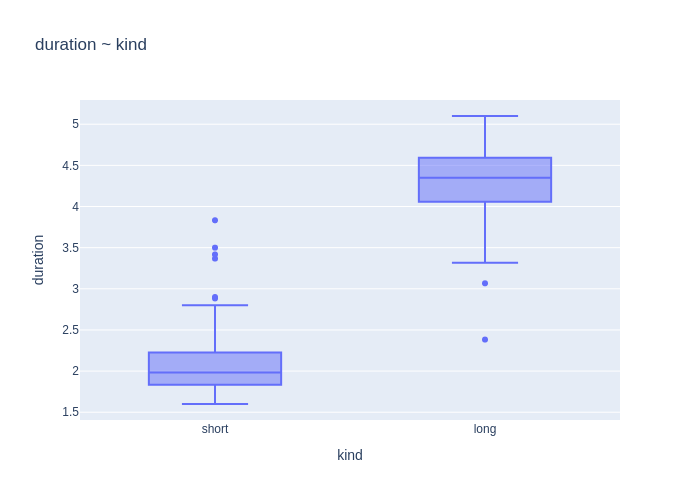

In [9]:
from IPython.display import display

old_faithful = sns.load_dataset('geyser')


display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png")

The main difference between the new indicator variable based model and the models used preivously is that the indicator based model takes in 2 discrete inputs (which is the "kind/kategory" of the data point, and describes if the waiting time is "long" or "short") and outputs a average eruption duration for the "kind/kategory".

The models used previously take in a continuous input for the waiting time instead and predict the eruption duration. Specifically:

 - `smf.ols('duration ~ waiting', data=old_faithful)` uses the entire dataset, so it does not consider any differences between the two "kinds/kategories"
 - `smf.ols('duration ~ waiting', data=old_faithful[short_wait])` only uses observations in the dataset where the waiting time is "short"
 - `smf.ols('duration ~ waiting', data=old_faithful[long_wait])` only uses observations in the dataset where the waiting time is "long"
 
If there are differences between the trends in the two "kinds/kategories", modelling them seperately would allow us to predict eruption duration with more accuracy.

$H_0$ for the new indicator based model would be that $\beta_{contrast}=0$, which means that there is no difference between the two "kinds/kategories"

Since $0$ is not within the 95% confidence interval of `C(kind, Treatment(reference="short"))[T.long]`, that means that we can be confident that the null hypothesis is not true and can therefore reject it.

https://chatgpt.com/share/672d7e76-5430-8013-86e8-80b1d4fced3f

## 12

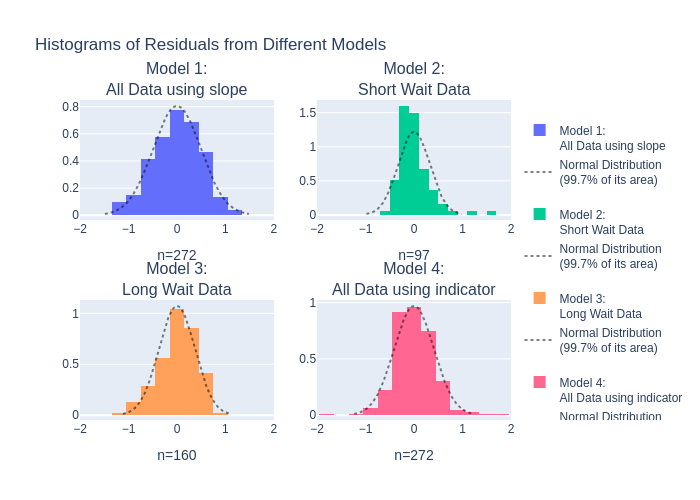

In [10]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png")

Model 1 is the only one that suggests the distribution of the error terms is normal, as the distributional shape of the residuals follows the normal distribution curve almost perfectly.

Model 2 and 3's distributions of residuals have a right and left skew, respectively, which suggests that the distribution of the error terms for both models is not normal

Model 4's residuals are tightly distributed around 0, with some residuals further away from 0, so it does not follow the normal distribution curve very well.

## 13

In [11]:
import numpy as np
import pandas as pd
from scipy import stats

# Load the Old Faithful dataset from seaborn
import seaborn as sns
geyser = sns.load_dataset('geyser')

# Define "short" and "long" wait times based on the user's criteria
geyser['wait_type'] = np.where(geyser['waiting'] < 68, 'short', 'long')

# Separate eruption durations based on the wait time type
short_durations = geyser[geyser['wait_type'] == 'short']['duration']
long_durations = geyser[geyser['wait_type'] == 'long']['duration']

# Observed difference in means between "short" and "long" wait times
observed_diff = short_durations.mean() - long_durations.mean()

# Permutation test to simulate the null distribution
n_permutations = 10000
permuted_diffs = []

for _ in range(n_permutations):
    shuffled_labels = np.random.permutation(geyser['wait_type'])
    short_durations_perm = geyser[shuffled_labels == 'short']['duration']
    long_durations_perm = geyser[shuffled_labels == 'long']['duration']
    permuted_diff = short_durations_perm.mean() - long_durations_perm.mean()
    permuted_diffs.append(permuted_diff)

# p-value: Proportion of permuted differences at least as extreme as the observed difference
p_value = (np.abs(permuted_diffs) >= np.abs(observed_diff)).mean()

# Bootstrapping for the 95% confidence interval
n_bootstraps = 10000
bootstrapped_mean_diffs = []

for _ in range(n_bootstraps):
    short_sample = np.random.choice(short_durations, size=len(short_durations), replace=True)
    long_sample = np.random.choice(long_durations, size=len(long_durations), replace=True)
    mean_diff = short_sample.mean() - long_sample.mean()
    bootstrapped_mean_diffs.append(mean_diff)

# 95% bootstrap confidence interval
confidence_interval = np.quantile(bootstrapped_mean_diffs, [0.025, 0.975])

print("Observed difference in means:", observed_diff)
print("p-value from permutation test:", p_value)
print("95% Bootstrap Confidence Interval for the mean difference:", confidence_interval)


Observed difference in means: -2.2036002325581396
p-value from permutation test: 0.0
95% Bootstrap Confidence Interval for the mean difference: [-2.30147372 -2.10112086]


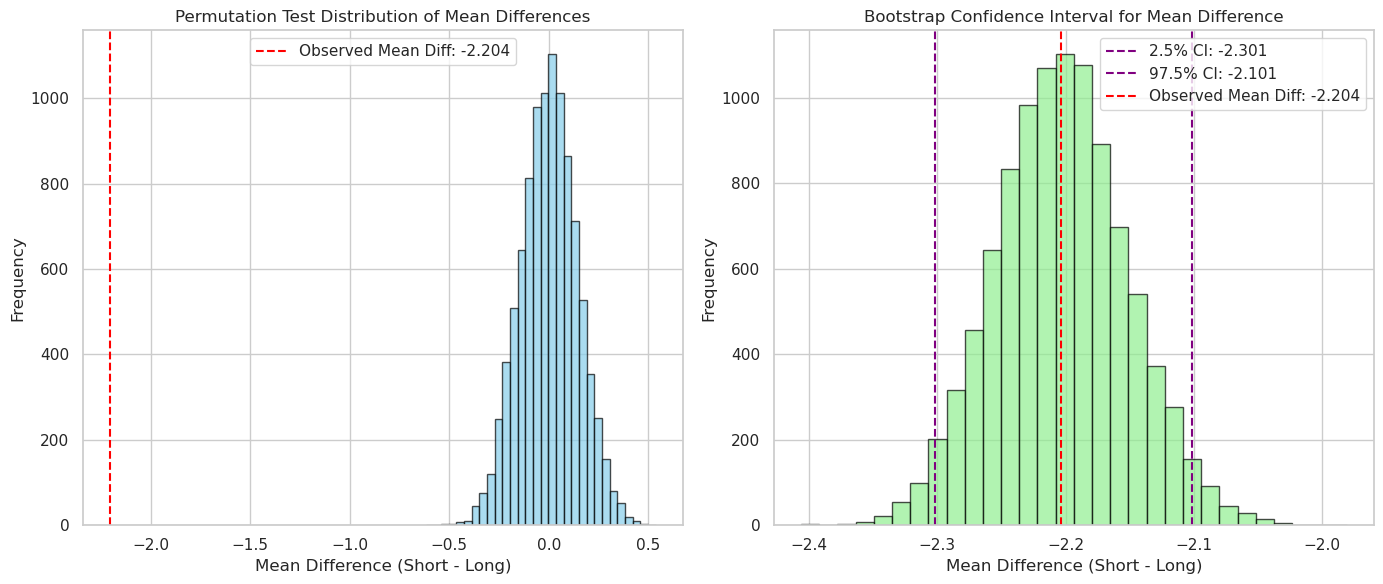

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot Permutation Test Results
plt.figure(figsize=(14, 6))

# Plot the permutation distribution
plt.subplot(1, 2, 1)
plt.hist(permuted_diffs, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(observed_diff, color='red', linestyle='--', label=f'Observed Mean Diff: {observed_diff:.3f}')
plt.title("Permutation Test Distribution of Mean Differences")
plt.xlabel("Mean Difference (Short - Long)")
plt.ylabel("Frequency")
plt.legend()

# Plot Bootstrap Confidence Interval Results
plt.subplot(1, 2, 2)
plt.hist(bootstrapped_mean_diffs, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(confidence_interval[0], color='purple', linestyle='--', label=f'2.5% CI: {confidence_interval[0]:.3f}')
plt.axvline(confidence_interval[1], color='purple', linestyle='--', label=f'97.5% CI: {confidence_interval[1]:.3f}')
plt.axvline(observed_diff, color='red', linestyle='--', label=f'Observed Mean Diff: {observed_diff:.3f}')
plt.title("Bootstrap Confidence Interval for Mean Difference")
plt.xlabel("Mean Difference (Short - Long)")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()


https://chatgpt.com/share/672d958a-259c-8013-9fa9-50f71eb28dee